In [98]:
#----------------Dependencies----------------#

#City and Weather Data:
from citipy import citipy 
import openweathermapy as owm #decided not to use this

#Analysis/Plotting Tools:
import pandas as pd
import matplotlib.pyplot as plt

#Mathematical tools:
from random import uniform
import time 
import numpy as np
import datetime

#Query Tools:
from config import api_key #api_key has been disabled, please use your own, thanks!
import requests
import json
from pprint import pprint as pp

#----------------Dependencies----------------#

#### The List of Cities We Want Data For

In [113]:
#Generate a random list of Cities

#intialize empty lists: cities, latitude, longitude

cities = []
latitude = []
longitude = []

#Loop for a certain amount of times
for x in range (2):
    #set random coordinate values (latitude and longitude)
    lat = np.random.uniform(-90.000, 90.000)
    lon = np.random.uniform(-180.000,180.000)
   
    #append coordinate values to latitude and longitude lists
    latitude.append(lat)
    longitude.append(lon)
    
    #Find city closest to the coordinate values: Use Citipy library
    city_obj = citipy.nearest_city(lat,lon)
    
    #Set variables city_name, country_code; to the name of the city and the country code for that city
    city_name = city_obj.city_name
    
    
    #Add the city_name to the cities list only if it's not already in the list
    if city_name not in cities:
        cities.append(city_name)
        
    
    
#capitalize first letter of each city in cities and uppercase for countries (list comprehensions)

cities = [city.capitalize() for city in cities]




#Test print
#print(cities)
#print(countries)


#### Fetching Weather Data from OpenWeatherMap API

In [114]:
#Query variables: url query_url

url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key + "&q=" #input your own api key here

In [115]:
#Test query

#weather_response = requests.get(query_url + "Houston" + "&units=imperial")
#weather_json = weather_response.json()
#pp(weather_json)

In [128]:
#Lists to hold values of temperature, humidity, cloudiness and wind speed

city_names = []
country_names = []
current_temp = []
humidity = []
cloudy = []
wind_speed = []
dates = []
times = []


In [129]:
#Create counting variable
count = 0

#print initial 
print("Initializing Data Retrieval")
print("-----------------------------")

#Open Weather Map query loop
for city in cities:
    
    #Get Date and time
    day_time = datetime.datetime.today()
    date = day_time.strftime("%Y-%m-%d")
    time_now = day_time.strftime("%H:%M %p %Z") + "(US-CST)"
    
    #Append to dates and times lists
    dates.append(date)
    times.append(time_now)
    
    #Print what City we're getting data for
    print(f"Now finding weather data for City {count + 1} | Date:{date} Time:{time_now}| Location: {city}, {countries[count]}.")
    
    #Print Dotted Line
    print("-------------------------------------------------------------------------------------------------------")
    
    #Query via API call and turn it into a JSON format
    weather_response = requests.get(query_url  + city + "&units=imperial")
    weather_json = weather_response.json()
    
    #Retrieve desired values: temp, humidity, cloudiness, wind speed
    city_name = weather_json["name"]
    country_name = weather_json["sys"]["country"]
    temperature = weather_json['main']['temp_max']
    humidy = weather_json['main']['humidity']
    cloudiness = weather_json['clouds']['all']
    wind = weather_json["wind"]["speed"]
    
    #Append values to lists created above
    city_names.append(city_name)
    country_names.append(country_name)
    current_temp.append(temperature)
    humidity.append(humidy)
    cloudy.append(cloudiness)
    wind_speed.append(wind)
    
    #Add to counter
    count = count + 1
    
    #print(temperature, humidy, cloudiness, wind)

    #Time constraint
    time.sleep(1)
    
    
#pp(weather_json)


Initializing Data Retrieval
-----------------------------
Now finding weather data for City 1 | Date:2019-03-19 Time:13:14 PM (US-CST)| Location: Vung tau, TH.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 2 | Date:2019-03-19 Time:13:14 PM (US-CST)| Location: Presidencia roque saenz pena, SC.
-------------------------------------------------------------------------------------------------------


In [130]:
#Test print lists
#print(cities, dates, times)
#print(current_temp)

#### Transform Data into a Pandas DataFrame

In [131]:
#Create dictionary from lists: combined_dict
combined_dict = {"City": city_names,
                 "Country": country_names,
                 "Date": dates,
                 "Time": times,
                 "Latitude": latitude,
                 "Longitude": longitude,
                 "Max Temperature (°F)": current_temp,
                 "Humidity (%)": humidity,
                 "Cloudiness (%)": cloudy,
                 "Wind Speed (mph)": wind_speed,
                 
                }
combined_dict

#Create DataFrame from combined_dict: city_data_df
weather_data_df = pd.DataFrame(combined_dict)



weather_data_df.head()

,City,Country,Date,Time,Latitude,Longitude,Max Temperature (°F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Vung Tau,VN,2019-03-19,13:14 PM (US-CST),7.782241,108.704965,81.41,96,24,14.81
1,Presidencia Roque Saenz Pena,AR,2019-03-19,13:14 PM (US-CST),-25.806744,-61.624982,84.20,81,56,6.64


#### Scatter Plots Representing Relation between Weather Data and Latitude

In [140]:
#Export Cleaned Data to CSV
weather_data_df.to_csv("../WeatherPy/Files/Weather_data.csv")

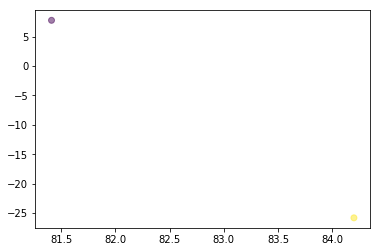

In [136]:
#Temperature and Latitude
colors = (0,4)
plt.scatter(weather_data_df['Max Temperature (°F)'], weather_data_df['Latitude'], c=colors, alpha=0.5 )

In [ ]:
#Humidity and Latitude

In [ ]:
#Cloudiness and Latitude

In [ ]:
#Wind speed and Latitude